In [16]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv("income.csv")
df.head()

,Age,Income($)
0,30,40353
1,29,85497
2,32,76317
3,45,38418
4,29,30671


Text(0, 0.5, 'Income($)')

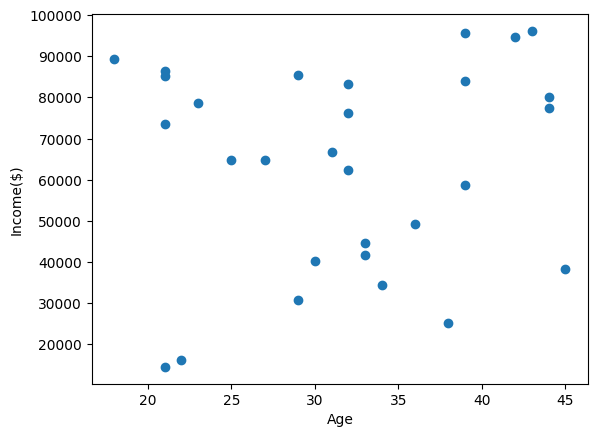

In [18]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0,
       1, 1, 2, 1, 1, 0, 1], dtype=int32)

In [20]:
df['cluster']=y_predicted
df.head()

,Age,Income($),cluster
0,30,40353,2
1,29,85497,1
2,32,76317,1
3,45,38418,2
4,29,30671,2


In [21]:
km.cluster_centers_

array([[3.01428571e+01, 6.29277143e+04],
       [3.28461538e+01, 8.55653846e+04],
       [3.16666667e+01, 3.17864444e+04]])

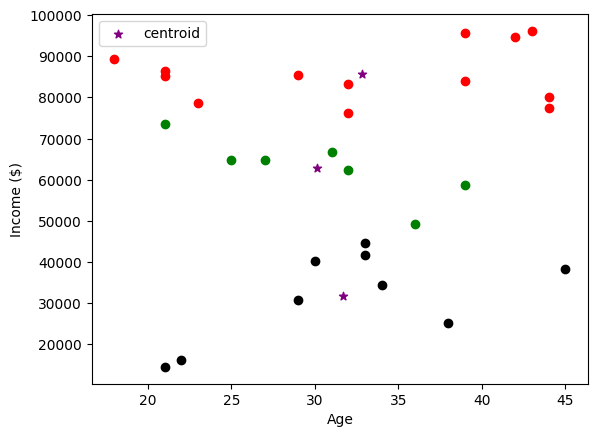

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [23]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [24]:
df.head()

,Age,Income($),cluster
0,0.444444,0.316560,2
1,0.407407,0.869673,1
2,0.518519,0.757198,1
3,1.000000,0.292852,2
4,0.407407,0.197934,2


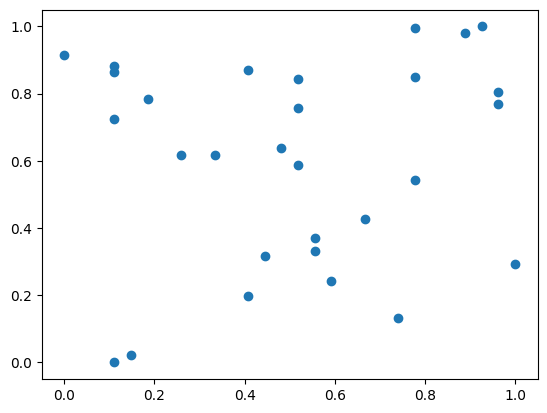

In [25]:
plt.scatter(df.Age,df['Income($)'])

In [26]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 2, 1, 1, 2, 1], dtype=int32)

In [27]:
df['cluster']=y_predicted
df.head()

,Age,Income($),cluster
0,0.444444,0.316560,2
1,0.407407,0.869673,0
2,0.518519,0.757198,0
3,1.000000,0.292852,2
4,0.407407,0.197934,2


In [28]:
km.cluster_centers_

array([[0.2962963 , 0.75831618],
       [0.86772487, 0.84893213],
       [0.52222222, 0.23307849]])

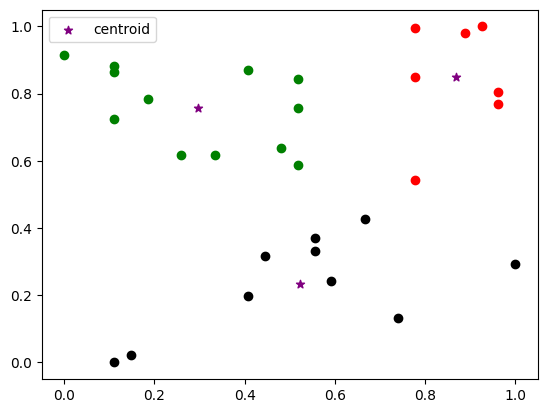

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()